In [ ]:
import pandas as pd
import numpy as np
from selenium import webdriver
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (ElementNotVisibleException, ElementNotSelectableException, NoSuchElementException)
from selenium.webdriver.support.select import Select
from selenium.webdriver import Chrome
import datetime
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

<b>Getting the links to all the pages containing the data we need about non-adopted dogs and saving it to a text file.</b>

In [ ]:
driver = uc.Chrome()
links=[]
ignore_list = [ElementNotVisibleException, ElementNotSelectableException]
for i in range(625):
    driver.get(f'https://www.petfinder.com/search/dogs-for-adoption/ca/newfoundland-and-labrador/?distance=Anywhere&page={i}')

    wait = WebDriverWait(driver, timeout=20, poll_frequency=1, ignored_exceptions=ignore_list)
    element = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@data-test='Pet_Card_Pet_Details_List']")))

    search_links = driver.find_elements(By.XPATH,"//a[@href][@class='petCard-link']")

    for result in search_links:
        links.append(result.get_attribute("href"))

driver.quit()
f = open("non_adopted_links.txt", "w")
for link in links:
    f.write(link+"\n")
f.close()

<b>Getting the data from every link we collected in the last step.</b>

In [ ]:
dt = datetime.now()
ts = datetime.timestamp(dt)
dt = datetime.fromtimestamp(ts)
print(dt)

driver = uc.Chrome()

names=[]
age_groups=[]
races=[]
sexes=[]
sizes=[]
colors=[]
vaccinations=[]
adoption_fee=[]
coat_length=[]
house_trained=[]
prefers_home_with=[]
prefers_home_without=[]
adopted=[]

ignore_list = [ElementNotVisibleException, ElementNotSelectableException]

index=0

for link in links:

    for j in range(10):
        if index==25000*0.1*(j+1):
            print((j+1)*10,"% Done")
            break

    index+=1

    adopted.append(0)
    adoptionFee=False
    houseTrained=False
    coatLen=False
    vaccinated=False
    prefersHomeWith=False
    prefersHomeWithout=False

    driver.get(link)
    wait = WebDriverWait(driver, timeout=20, poll_frequency=1, ignored_exceptions=ignore_list)
    try:
        element = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@class='u-displayBlock u-vr4x u-vr2x@minMd']")))
    except:
        continue

    try:
        name = driver.find_element(By.XPATH,"//span[@data-test='Pet_Name']")
        names.append(name.text)
    except:
        names.append(None)

    try:
        race = driver.find_element(By.XPATH,"//span[@data-test='Pet_Breeds']")
        races.append(race.text)
    except:
        races.append(None)

    try:
        age = driver.find_element(By.XPATH,"//span[@data-test='Pet_Age']")
        age_groups.append(age.text)
    except:
        age_groups.append(None)

    try:
        sex = driver.find_element(By.XPATH,"//span[@data-test='Pet_Sex']")
        sexes.append(sex.text)
    except:
        sexes.append(None)

    try:
        size = driver.find_element(By.XPATH,"//span[@data-test='Pet_Full_Grown_Size']")
        sizes.append(size.text)
    except:
        sizes.append(None)

    try:
        color = driver.find_element(By.XPATH,"//span[@data-test='Pet_Primary_Color']")
        colors.append(color.text)
    except:
        colors.append(None)

    try:
        options = driver.find_element(By.XPATH,"//div[@class='grid grid_gutterLg u-vr4x']")

        texts=options.text.split("\n")
        length=len(texts)

        for i in range(length):
            if texts[i]=="COAT LENGTH":
                coat_length.append(texts[i+1])
                coatLen=True
            elif texts[i]=="HOUSE-TRAINED":
                house_trained.append(texts[i+1])
                houseTrained=True
            elif texts[i]=="HEALTH":
                vaccinations.append(texts[i+1])
                vaccinated=True
            elif texts[i]=="GOOD IN A HOME WITH":
                prefers_home_with.append(texts[i+1])
                prefersHomeWith=True
            elif texts[i]=="PREFERS A HOME WITHOUT":
                prefers_home_without.append(texts[i+1])
                prefersHomeWithout=True
            elif texts[i]=="ADOPTION FEE":
                adoption_fee.append(texts[i+1])
                adoptionFee=True

        if coatLen==False:
            coat_length.append(None)
        if houseTrained==False:
            house_trained.append(None)
        if vaccinated==False:
            vaccinations.append(None)
        if prefersHomeWith==False:
            prefers_home_with.append(None)
        if prefersHomeWithout==False:
            prefers_home_without.append(None)
        if adoptionFee==False:
            adoption_fee.append(None)

    except:
        coat_length.append(None)
        house_trained.append(None)
        vaccinations.append(None)
        prefers_home_with.append(None)
        prefers_home_without.append(None)
        adoption_fee.append(None)

driver.quit()

lists=[names,age_groups,races,sexes,sizes,colors,vaccinations,adoption_fee,coat_length,house_trained,prefers_home_with,prefers_home_without]
file_names=["names.txt","age_groups.txt","races.txt","sexes.txt","sizes.txt",
           "colors.txt","vaccinations.txt","adoption_fee.txt","coat_length.txt","house_trained.txt","prefers_home_with.txt","prefers_home_without.txt"]
for i in range(len(lists)):
    f = open(file_names[i], "w")
    for item in lists[i]:
        if item==None:
            f.write("None\n")
        else:
            f.write(item+"\n")
    f.close()

dt = datetime.now()
ts = datetime.timestamp(dt)
dt = datetime.fromtimestamp(ts)
print(dt)

2023-05-05 16:43:16.629656
10 % Done
20 % Done
30 % Done
40 % Done
50 % Done
60 % Done
70 % Done
80 % Done
90 % Done
100 % Done
2023-05-06 04:00:55.789073


<b>Making sure we collected the data properly.</b>

In [ ]:
print(len(names))
print("---------------------------------------")
print(len(age_groups))
print("---------------------------------------")
print(len(races))
print("---------------------------------------")
print(len(sexes))
print("---------------------------------------")
print(len(sizes))
print("---------------------------------------")
print(len(colors))
print("---------------------------------------")
print(len(vaccinations))
print("---------------------------------------")
print(len(adoption_fee))
print("---------------------------------------")
print(len(coat_length))
print("---------------------------------------")
print(len(house_trained))
print("---------------------------------------")
print(len(prefers_home_with))
print("---------------------------------------")
print(len(prefers_home_without))

49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993
---------------------------------------
49993


<b>Getting the links to all the pages containing the data we need about adopted dogs and saving it to a text file.</b>

In [ ]:
driver = uc.Chrome()
links=[]
ignore_list = [ElementNotVisibleException, ElementNotSelectableException]
for i in range(625):
    driver.get(f'https://www.petfinder.com/search/dogs-adopted/ca/newfoundland-and-labrador/?distance=Anywhere&page={i}')

    wait = WebDriverWait(driver, timeout=20, poll_frequency=1, ignored_exceptions=ignore_list)
    element = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@data-test='Pet_Card_Pet_Details_List']")))

    search_links = driver.find_elements(By.XPATH,"//a[@href][@class='petCard-link']")

    for result in search_links:
        links.append(result.get_attribute("href"))

driver.quit()
f = open("adopted_links.txt", "w")
for link in links:
    f.write(link+"\n")
f.close()

<b>Getting the data from every link we collected in the last step.</b>

In [ ]:
dt = datetime.now()
ts = datetime.timestamp(dt)
dt = datetime.fromtimestamp(ts)
print(dt)

driver = uc.Chrome()

names=[]
age_groups=[]
races=[]
sexes=[]
sizes=[]
colors=[]
vaccinations=[]
adoption_fee=[]
coat_length=[]
house_trained=[]
prefers_home_with=[]
prefers_home_without=[]
adopted=[]

ignore_list = [ElementNotVisibleException, ElementNotSelectableException]

index=0

for link in links:

    for j in range(10):
        if index==25000*0.1*(j+1):
            print((j+1)*10,"% Done")
            break

    index+=1

    adopted.append(0)
    adoptionFee=False
    houseTrained=False
    coatLen=False
    vaccinated=False
    prefersHomeWith=False
    prefersHomeWithout=False

    driver.get(link)
    wait = WebDriverWait(driver, timeout=20, poll_frequency=1, ignored_exceptions=ignore_list)
    try:
        element = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@class='u-displayBlock u-vr4x u-vr2x@minMd']")))
    except:
        continue

    try:
        name = driver.find_element(By.XPATH,"//span[@data-test='Pet_Name']")
        names.append(name.text)
    except:
        names.append(None)

    try:
        race = driver.find_element(By.XPATH,"//span[@data-test='Pet_Breeds']")
        races.append(race.text)
    except:
        races.append(None)

    try:
        age = driver.find_element(By.XPATH,"//span[@data-test='Pet_Age']")
        age_groups.append(age.text)
    except:
        age_groups.append(None)

    try:
        sex = driver.find_element(By.XPATH,"//span[@data-test='Pet_Sex']")
        sexes.append(sex.text)
    except:
        sexes.append(None)

    try:
        size = driver.find_element(By.XPATH,"//span[@data-test='Pet_Full_Grown_Size']")
        sizes.append(size.text)
    except:
        sizes.append(None)

    try:
        color = driver.find_element(By.XPATH,"//span[@data-test='Pet_Primary_Color']")
        colors.append(color.text)
    except:
        colors.append(None)

    try:
        options = driver.find_element(By.XPATH,"//div[@class='grid grid_gutterLg u-vr4x']")

        texts=options.text.split("\n")
        length=len(texts)

        for i in range(length):
            if texts[i]=="COAT LENGTH":
                coat_length.append(texts[i+1])
                coatLen=True
            elif texts[i]=="HOUSE-TRAINED":
                house_trained.append(texts[i+1])
                houseTrained=True
            elif texts[i]=="HEALTH":
                vaccinations.append(texts[i+1])
                vaccinated=True
            elif texts[i]=="GOOD IN A HOME WITH":
                prefers_home_with.append(texts[i+1])
                prefersHomeWith=True
            elif texts[i]=="PREFERS A HOME WITHOUT":
                prefers_home_without.append(texts[i+1])
                prefersHomeWithout=True
            elif texts[i]=="ADOPTION FEE":
                adoption_fee.append(texts[i+1])
                adoptionFee=True

        if coatLen==False:
            coat_length.append(None)
        if houseTrained==False:
            house_trained.append(None)
        if vaccinated==False:
            vaccinations.append(None)
        if prefersHomeWith==False:
            prefers_home_with.append(None)
        if prefersHomeWithout==False:
            prefers_home_without.append(None)
        if adoptionFee==False:
            adoption_fee.append(None)

    except:
        coat_length.append(None)
        house_trained.append(None)
        vaccinations.append(None)
        prefers_home_with.append(None)
        prefers_home_without.append(None)
        adoption_fee.append(None)

driver.quit()

lists=[names,age_groups,races,sexes,sizes,colors,vaccinations,adoption_fee,coat_length,house_trained,prefers_home_with,prefers_home_without]
file_names=["names.txt","age_groups.txt","races.txt","sexes.txt","sizes.txt",
           "colors.txt","vaccinations.txt","adoption_fee.txt","coat_length.txt","house_trained.txt","prefers_home_with.txt","prefers_home_without.txt"]
for i in range(len(lists)):
    f = open(file_names[i], "w")
    for item in lists[i]:
        if item==None:
            f.write("None\n")
        else:
            f.write(item+"\n")
    f.close()

dt = datetime.now()
ts = datetime.timestamp(dt)
dt = datetime.fromtimestamp(ts)
print(dt)

<b>Making sure we collected the data properly.</b>

In [ ]:
print(len(names))
print("---------------------------------------")
print(len(age_groups))
print("---------------------------------------")
print(len(races))
print("---------------------------------------")
print(len(sexes))
print("---------------------------------------")
print(len(sizes))
print("---------------------------------------")
print(len(colors))
print("---------------------------------------")
print(len(vaccinations))
print("---------------------------------------")
print(len(adoption_fee))
print("---------------------------------------")
print(len(coat_length))
print("---------------------------------------")
print(len(house_trained))
print("---------------------------------------")
print(len(prefers_home_with))
print("---------------------------------------")
print(len(prefers_home_without))

49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997
---------------------------------------
49997


<b>Creating the dataframes from the lists we collected.</b>

In [ ]:
adopted=pd.DataFrame({"name":names1,"age_group":age_groups1,"race":races1,"sex":sexes1,"size":sizes1,"color":colors1,"vaccination":vaccinations1,"adoption_fee":adoption_fee1,"coat_length":coat_length1,"house_trained":house_trained1,"prefers_home_with":prefers_home_with1,"prefers_home_without":prefers_home_without1})
non_adopted=pd.DataFrame({"name":names2,"age_group":age_groups2,"race":races2,"sex":sexes2,"size":sizes2,"color":colors2,"vaccination":vaccinations2,"adoption_fee":adoption_fee2,"coat_length":coat_length2,"house_trained":house_trained2,"prefers_home_with":prefers_home_with2,"prefers_home_without":prefers_home_without2})

<b>Realizing that a dataframe already has a property named "size" so it can't have a column sharing the same name.</b>

In [ ]:
adopted=adopted.rename(columns={"size":"dog_size"})
non_adopted=non_adopted.rename(columns={"size":"dog_size"})

<b>Saving dataframes to csv files.</b>

In [ ]:
adopted.to_csv("adopted.csv",index=False)
non_adopted.to_csv("non_adopted.csv",index=False)

<b>Concating the dataframes to prevent writing the same lines of code twice.</b>

In [ ]:
mixed=pd.concat([adopted,non_adopted])

<b>Filling missing adoption fees with 0.</b>

In [ ]:
mixed.adoption_fee=mixed.adoption_fee.fillna(0)

<b>Converting the adoption fee column from string to number.</b>

In [ ]:
mixed.adoption_fee=mixed.adoption_fee.str.removesuffix("")
mixed.adoption_fee=mixed.adoption_fee.str.removeprefix("$")
mixed.adoption_fee=pd.to_numeric(mixed.adoption_fee)
mixed.adoption_fee.dtype

dtype('float64')


<b>Replacing the house trained column string values with numerical values and filling missing values with 0.</b>

In [ ]:
mixed.house_trained=mixed.house_trained.replace({"None":0,"Yes":1,"1":1,"0":0})
mixed.house_trained=mixed.house_trained.fillna(0)

<b>Replacing the dog size column string values with numerical values.</b>

In [ ]:
mixed.dog_size=mixed.dog_size.replace({"Small":1,"Medium":2,"Large":3,"Extra Large":4})

<b>Filling missing values in the sex column and Replacing the string values with numerical values.</b>

In [ ]:
mixed.sex=mixed.sex.replace({"Unknown":np.nan})
mixed.sex = mixed.sex.fillna(method='ffill').fillna(method='bfill')
mixed.sex=mixed.sex.replace({"Male":0,"Female":1})

<b>Replacing the string values in the age group column with numerical values.</b>

In [ ]:
mixed.age_group=mixed.age_group.replace({"Puppy":1,"Young":2,"Adult":3,"Senior":4})

<b>Filling missing values in the coat length column and Replacing the string values with numerical values.</b>

In [ ]:
mixed.coat_length = mixed.coat_length.replace({"nan":np.nan,"None":np.nan})
mixed.coat_length = mixed.coat_length.fillna(method='ffill').fillna(method='bfill')
mixed.coat_length = mixed.coat_length.replace({"Short":1,"Medium":2,"Long":3,"Wire":4,"Curly":5,"Hairless":6})

<b>For the "prefers home with" column, we decided to count the number of commas in the cell and assign a value accordingly, no text in the cell was assigned 0 and every other case was assigned the number of commas plus 1.</b>

In [ ]:
home_with=mixed.prefers_home_with.tolist()
count=[]
for i in range(len(home_with)):
    if type(home_with[i])==str:
        if home_with[i].count(",")==0:
            count.append(1)
        else:
            count.append(home_with[i].count(",")+1)
    else:
        count.append(0)
mixed.prefers_home_with=count

<b>The column "prefers home without" got the same treatment as the previous column.</b>

In [ ]:
home_without=mixed.prefers_home_without.tolist()
count=[]
for i in range(len(home_without)):
    if type(home_without[i])==str:
        if home_without[i].count(",")==0:
            count.append(1)
        else:
            count.append(home_without[i].count(",")+1)
    else:
        count.append(0)
mixed.prefers_home_without=count

<b>Filling missing values in the "vaccination" column and assigning a numerical value according to the text in the cell.

In [ ]:
mixed.vaccination = mixed.vaccination.fillna(method='ffill').fillna(method='bfill')
vaccination=mixed.vaccination.tolist()
count=[]
for vac in vaccination:
    if type(vac)!=str:
        print(vac)
        break
    if vac.find("Vaccinations up to date, spayed / neutered.")!=-1:
        count.append(1)
    elif vac.find("Vaccinations up to date.")!=-1 or vac.find("Spayed / neutered.")!=-1:
        count.append(2)
    else:
        count.append(3)
mixed["vaccination_count"]=count

<b>For the "race" column, we decided to check whether or not the dog is pure bred and assign a numerical value accordingly.

In [ ]:
race=mixed.race.tolist()
count=[]
for item in race:
    if item.find("Mix")!=-1:
        count.append(0)
    else:
        count.append(1)
mixed["race_num"]=count

<b>Assigning a boolean value to the "adoption fee" column.

In [ ]:
fee=mixed.adoption_fee.tolist()
count=[]
for item in fee:
    if item>0:
        count.append(1)
    else:
        count.append(0)
mixed["bool_adoption_fee"]=count

<b>Saving the current dataframe to a csv file to prevent accidents.

In [ ]:
mixed.to_csv("mixed_modified.csv",index=False)

In [ ]:
mixed=pd.read_csv("mixed_modified.csv")
plt.figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

</br></br></br></br><b>
In the graph bellow, we can see a few correlations between some of the attributes in our dataframe. In the following graphs we will show the correlations between those attributes!
</br></br></br></br>

<AxesSubplot:>

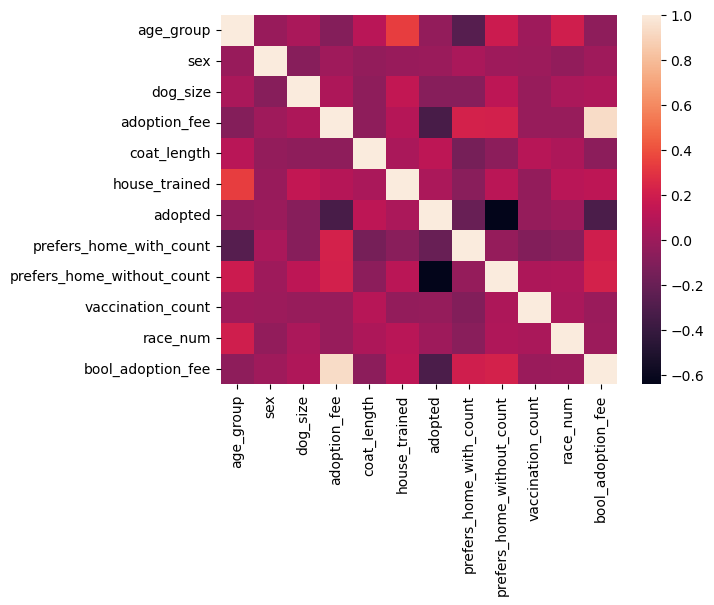

In [ ]:
sns.heatmap(mixed.corr())


</br></br></br></br><b>
In the graph bellow we can see the correlation between the amount of things that the dog can't live with in its house and whether or not it was adopted. We can see very clearly that even a sigle item will reduce the dog's chance to be adopted!</b>
</br></br></br></br>

Text(0.5, 1.0, 'Prefers Home Without vs. Adoption Rate')

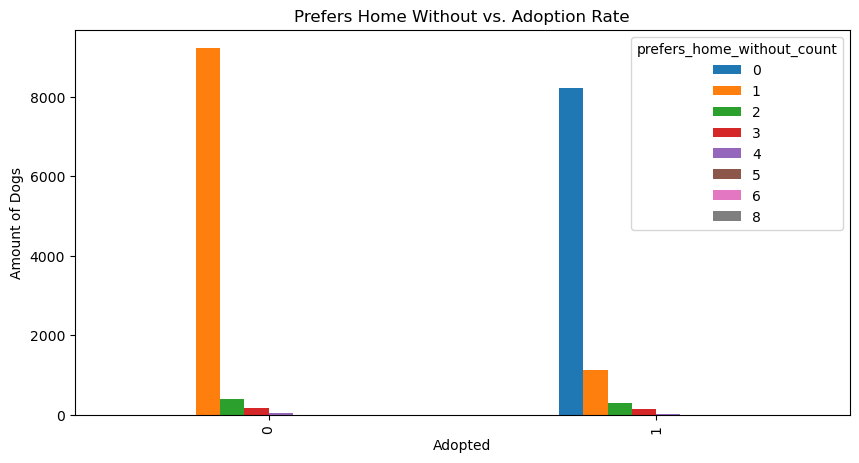

In [ ]:
pd.crosstab(mixed.adopted,mixed.prefers_home_without_count).plot(kind='bar',figsize=(10,5))
plt.ylabel('Amount of Dogs')
plt.xlabel('Adopted')
plt.title("Prefers Home Without vs. Adoption Rate")

</br></br></br></br><b>
In this graph, we can see that a dog that has an adoption fee has a lower chance of being adopted compared to a dog with no adoption fee!</b>
</br></br></br></br>

Text(0.5, 1.0, 'Adoption Fee vs. Adoption Rate')

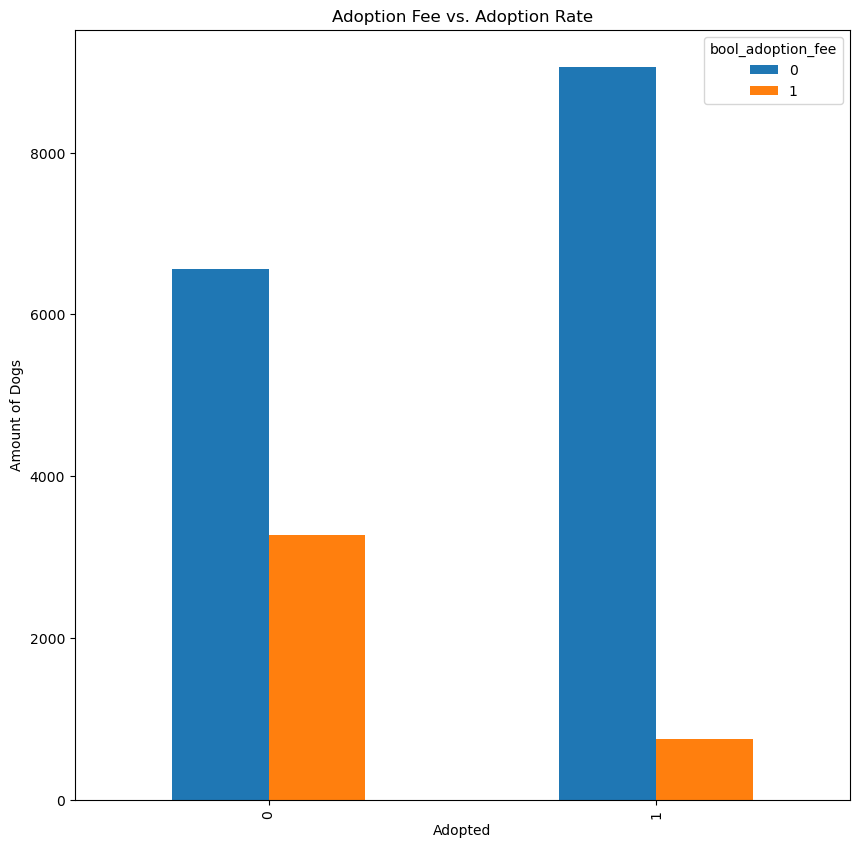

In [ ]:
pd.crosstab(mixed.adopted,mixed.bool_adoption_fee).plot(kind='bar',figsize=(10,10))
plt.ylabel('Amount of Dogs')
plt.xlabel('Adopted')
plt.title("Adoption Fee vs. Adoption Rate")

</br></br></br></br><b>
In the beginning of our project, we assumed that there is a coerrelation between the age of the dog and the chance that it will be adopted. in the following graph we can see that our assumption was incorrect and that in fact, <b>there is no correlation between the age of the dog and people's will to adopt it!</b>
</br></br></br></br>

Text(0.5, 1.0, 'Age vs. Adoption Rate')

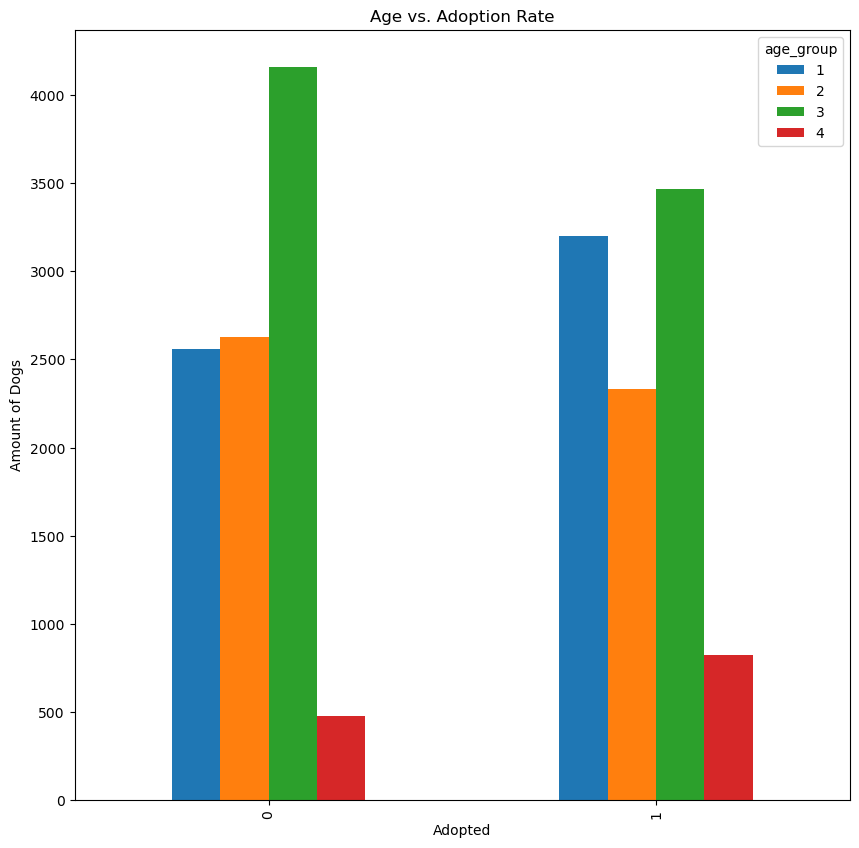

In [ ]:
pd.crosstab(mixed.adopted,mixed.age_group).plot(kind='bar',figsize=(10,10))
plt.ylabel('Amount of Dogs')
plt.xlabel('Adopted')
plt.title("Age vs. Adoption Rate")

</br></br></br></br><b>
We also assumed that people would prefer to adopt a pure bred dog rather than a mixed breed which turned out to also be incorrect</b>.
</br></br></br></br>

Text(0.5, 1.0, 'Dog Breed vs. Adoption Rate')

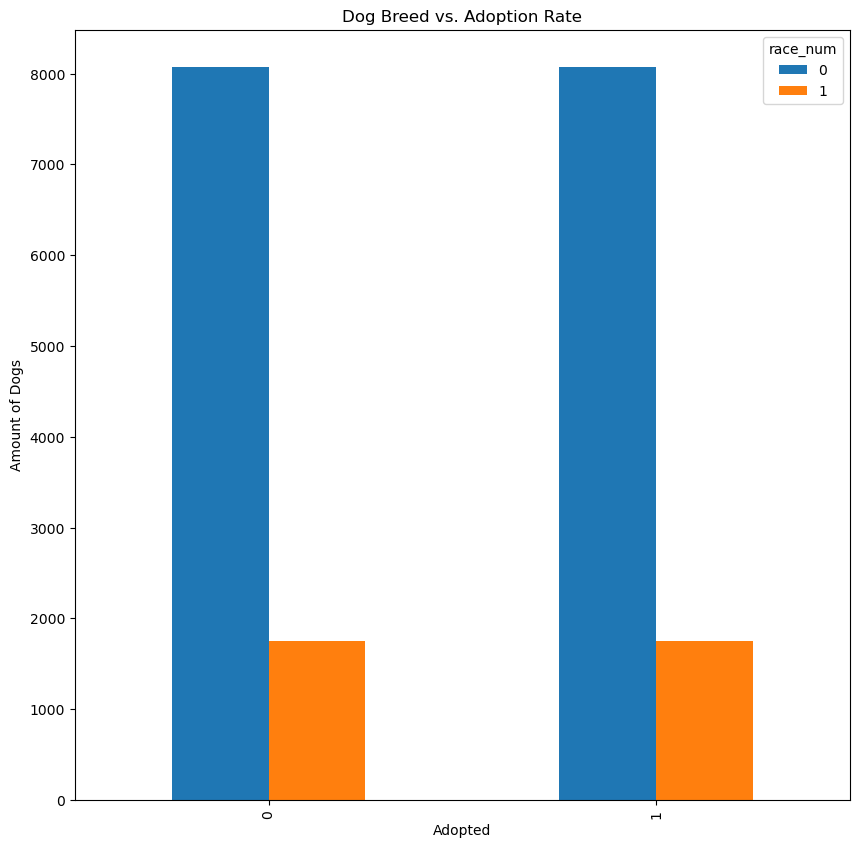

In [ ]:
pd.crosstab(mixed.adopted,mixed.race_num).plot(kind='bar',figsize=(10,10))
plt.ylabel('Amount of Dogs')
plt.xlabel('Adopted')
plt.title("Dog Breed vs. Adoption Rate")

<b>Shuffling the dataframe so that the dataframe won't be made of two parts which are exclusively adopted or non-adopted and also dropping the irrelevant string columns.

In [ ]:
mixed=mixed.copy().sort_values(by="name")
mixed=mixed.copy().drop(columns={"name","color"}).dropna(0,how="any")

C:\Users\Herr Yulie\AppData\Local\Temp\ipykernel_2652\844104349.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  mixed=mixed.copy().drop(columns={"name","color"}).dropna(0,how="any")


<b>Seperating the dataframe to X and y tables.

In [ ]:
y=pd.DataFrame({"adopted":mixed.adopted})
X=mixed.copy().drop(columns="adopted")

<b>Dividing the tables to train sets and test sets.

In [ ]:
y_vector=pd.DataFrame({"adopted":mixed.adopted})
X_train=X.head(13757)
y_train=y_vector.head(13757)
X_test=X.tail(5896)
y_test=y_vector.tail(5896)

<b>Creating a model an training it using the training sets.

In [ ]:
model=LogisticRegression(max_iter=15000)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model.fit(X_train,y_train)

LogisticRegression(max_iter=15000)

<b>Testing the model using the test sets.

In [ ]:
predictions=model.predict(X_test)
y_pred = pd.Series(predictions,index=X_test.index)
print("accuracy is:",metrics.accuracy_score(y_test, y_pred))
print("precision is:",metrics.precision_score(y_test, y_pred))
print("recall is:",metrics.recall_score(y_test, y_pred))
print("f1 is:",metrics.f1_score(y_test, y_pred))

accuracy is: 0.9328358208955224
precision is: 0.9626068376068376
recall is: 0.9028056112224448
f1 is: 0.9317476732161324


<b>Calculating the confusion matrix for the test set.

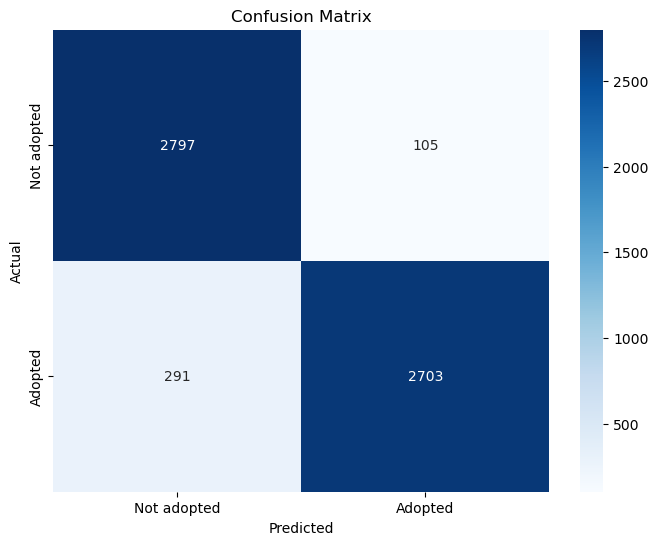

In [ ]:
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not adopted', 'Adopted']  # Replace with your actual class labels
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

plt.show()

<b>The results we got using the test set were extremely good, which made us suspect that we either did somethig wrong or we got lucky with the test cases. We decided to get more test cases so we ran the web crawler again to get more dogs data in order to run another test. The additional dogs got the same data cleaning treatment as the train and test sets.

In [ ]:
y2=pd.read_csv("y.csv")
X2=pd.read_csv("X.csv")
X2["adopted"]=y2
X2=X2.sort_values(by="name")
X2=X2.drop(columns={"name","color"}).dropna(0,"any")
y2=X2.adopted
X2=X2.drop(columns="adopted")

C:\Users\Herr Yulie\AppData\Local\Temp\ipykernel_9680\857319891.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  X2=X2.drop(columns={"name","color"}).dropna(0,"any")


<b>The results we got from the second test set were more in line with the results we expected.

In [ ]:
predictions=model.predict(X2)
y_pred = pd.Series(predictions,index=X2.index)
print("accuracy is:",metrics.accuracy_score(y2, y_pred))
print("precision is:",metrics.precision_score(y2, y_pred))
print("recall is:",metrics.recall_score(y2, y_pred))
print("f1 is:",metrics.f1_score(y2, y_pred))

accuracy is: 0.577189286789046
precision is: 0.5453687315634218
recall is: 0.9273675762439807
f1 is: 0.6868266587413626


<b>We calculated the confusion matrix for the second test set.

([<matplotlib.axis.YTick at 0x246511222b0>,
 [Text(0, 0.5, 'Not adopted'), Text(0, 1.5, 'Adopted')])

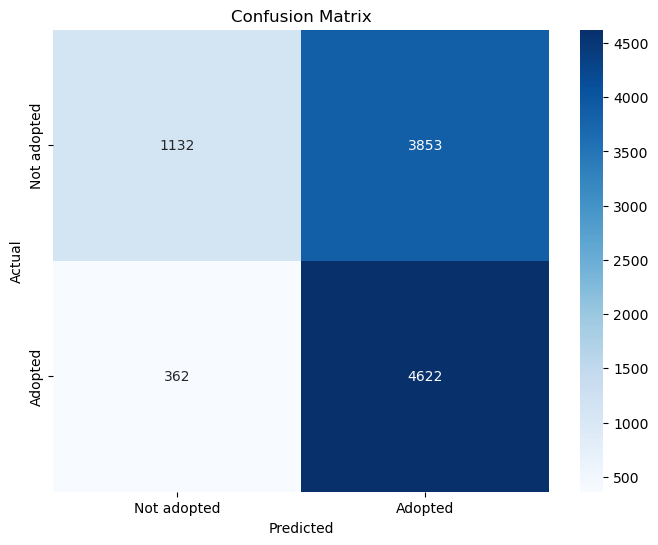

In [ ]:
y_pred = model.predict(X2)
cm = metrics.confusion_matrix(y2, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not adopted', 'Adopted']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

<b>We started questioning whether or not the "coat length" property was processed correctly and decided to run the test without said column.

In [ ]:
mixed_no_coat=mixed.drop(columns="coat_length")

In [ ]:
y_no_coat=pd.DataFrame({"adopted":mixed_no_coat.adopted})
X_no_coat=mixed_no_coat.copy().drop(columns="adopted")
y_vector_no_coat=pd.DataFrame({"adopted":mixed_no_coat.adopted})
X_train_no_coat=X_no_coat.head(13757)
y_train_no_coat=y_vector_no_coat.head(13757)
X_test_no_coat=X_no_coat.tail(5896)
y_test_no_coat=y_vector_no_coat.tail(5896)

In [ ]:
model_no_coat=LogisticRegression(max_iter=15000)
y_train_no_coat=np.ravel(y_train_no_coat)
y_test_no_coat=np.ravel(y_test_no_coat)
model_no_coat.fit(X_train_no_coat,y_train_no_coat)

LogisticRegression(max_iter=15000)

([<matplotlib.axis.YTick at 0x1e9abf64f40>,
 [Text(0, 0.5, 'Not adopted'), Text(0, 1.5, 'Adopted')])

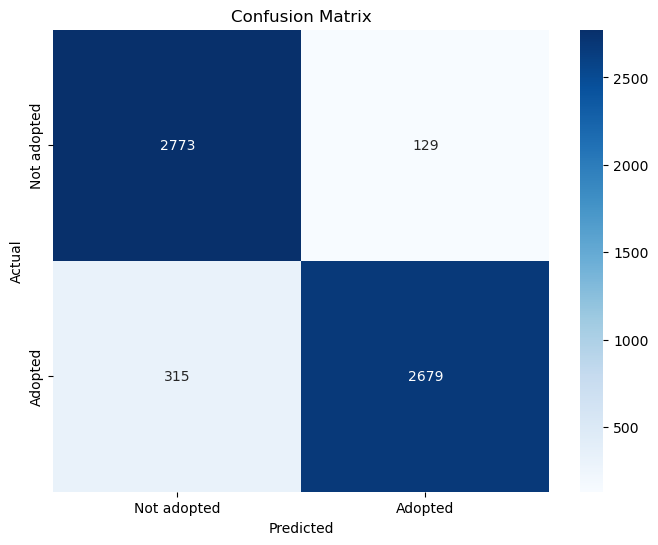

In [ ]:
y_pred_no_coat = model_no_coat.predict(X_test_no_coat)
cm_no_coat = metrics.confusion_matrix(y_test_no_coat, y_pred_no_coat)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_coat, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not adopted', 'Adopted']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

In [ ]:
y_pred = pd.Series(y_pred_no_coat,index=X_test_no_coat.index)
print("accuracy is:",metrics.accuracy_score(y_test_no_coat, y_pred_no_coat))
print("precision is:",metrics.precision_score(y_test_no_coat, y_pred_no_coat))
print("recall is:",metrics.recall_score(y_test_no_coat, y_pred_no_coat))
print("f1 is:",metrics.f1_score(y_test_no_coat, y_pred_no_coat))

accuracy is: 0.9246947082767978
precision is: 0.9540598290598291
recall is: 0.8947895791583166
f1 is: 0.9234746639089968


<b>After testing the model without the "coat length" property on the original dataset, we saw that the results were suspiciously high, so we ran the test on the more recent dataset.

In [ ]:
y2=pd.read_csv("y.csv")
X2=pd.read_csv("X.csv")
X2["adopted"]=y2
X2=X2.sort_values(by="name")
X2=X2.drop(columns={"name","color","coat_length"}).dropna(0,"any")
y2=X2.adopted
X2=X2.drop(columns="adopted")

C:\Users\Herr Yulie\AppData\Local\Temp\ipykernel_2652\977109800.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  X2=X2.drop(columns={"name","color","coat_length"}).dropna(0,"any")


([<matplotlib.axis.YTick at 0x1e9a689ab50>,
 [Text(0, 0.5, 'Not adopted'), Text(0, 1.5, 'Adopted')])

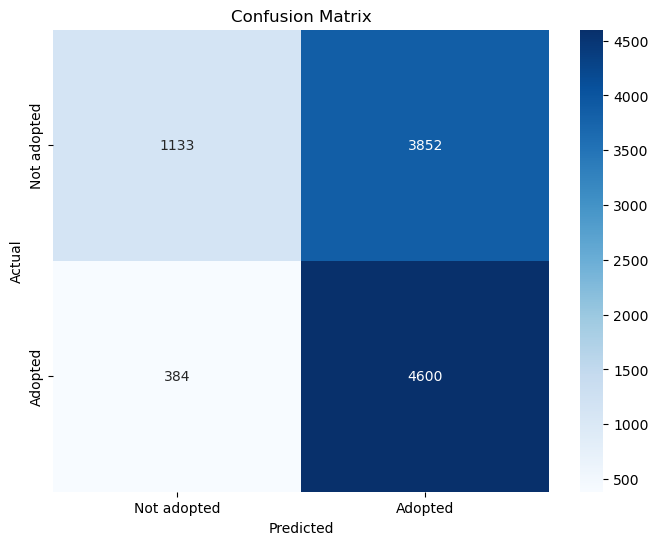

In [ ]:
y_pred2 = model_no_coat.predict(X2)
cm_no_coat2 = metrics.confusion_matrix(y2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_coat2, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not adopted', 'Adopted']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

In [ ]:
y_pred = pd.Series(y_pred2,index=X2.index)
print("accuracy is:",metrics.accuracy_score(y2, y_pred2))
print("precision is:",metrics.precision_score(y2, y_pred2))
print("recall is:",metrics.recall_score(y2, y_pred2))
print("f1 is:",metrics.f1_score(y2, y_pred2))

accuracy is: 0.5750827565452904
precision is: 0.5442498816848084
recall is: 0.9229534510433387
f1 is: 0.6847275974992557


<b>The new test results were more on par with the expected outcome.